In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [134]:
!pip list |grep Keras

Keras                    2.2.4                
Keras-Applications       1.0.8                
Keras-Preprocessing      1.1.0                


In [52]:
import sys
import numpy
import matplotlib
import pandas
import keras

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Matplotlib: 3.0.3
Pandas: 0.24.2
Keras: 2.2.4


In [0]:
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [54]:
model = VGG16(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 10
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = VGG16(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)
    
#     input_tensor = input_tensor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [55]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 336, 336, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 336, 336, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 336, 336, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 168, 168, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 168, 168, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 168, 168, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 84, 84, 128)       0         
__________

In [0]:
for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(
#     1024,
#     activation = 'relu')(x)

# x = Dropout(0.5)(x)

# x = Dense(
#     512,
#     activation = 'relu')(x)

output = Dense(
    5,
    activation='softmax')(x)

model = Model(
    inputs=base_model.input,
    outputs=output)

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 336, 336, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 336, 336, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 336, 336, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 168, 168, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 168, 168, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 168, 168, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 84, 84, 128)       0         
__________

In [0]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0)
#     width_shift_range=0.2,
#     height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/train',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/My Drive/data/valid',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 4438 images belonging to 5 classes.
Found 1218 images belonging to 5 classes.


In [0]:
x_batch, y_batch = next(train_generator)

In [62]:
print(x_batch.max())
print(x_batch.min())

1.0
0.0


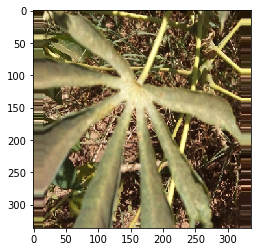

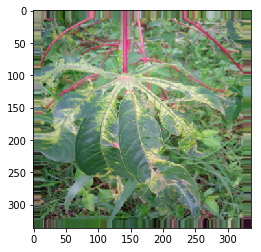

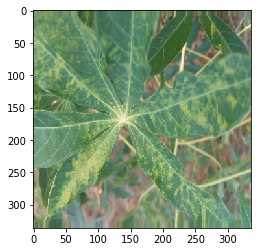

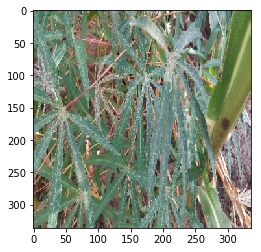

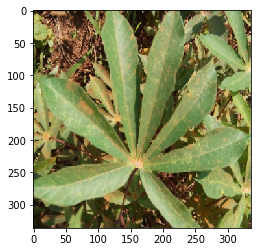

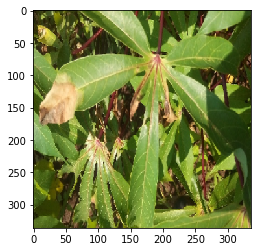

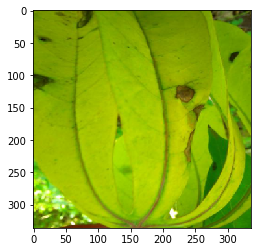

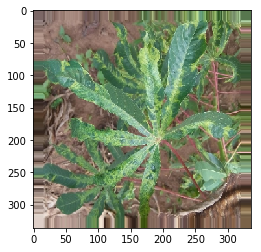

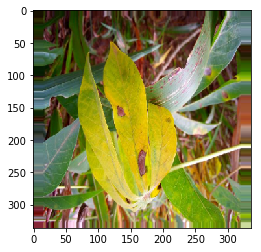

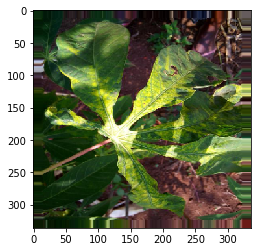

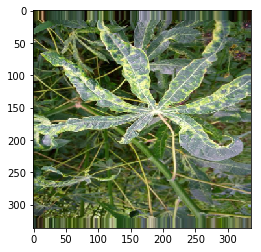

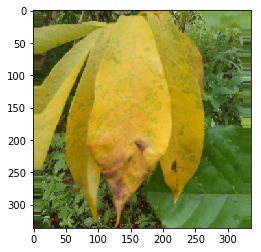

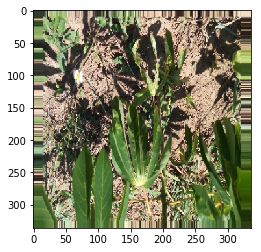

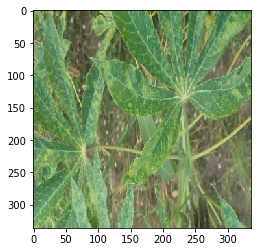

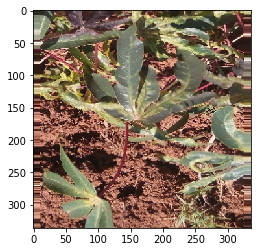

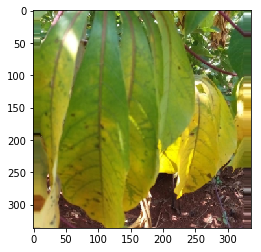

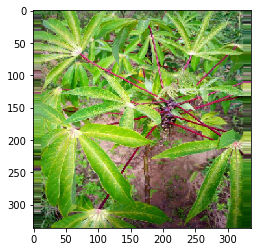

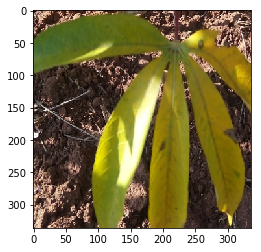

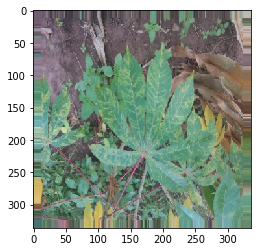

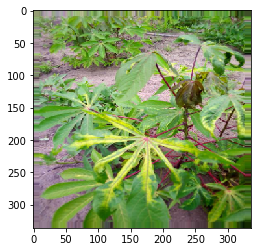

In [63]:
import matplotlib.pyplot as plt

for i in range (0,20):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [0]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = 1e-5),
              metrics = ['accuracy'])

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     restore_best_weights=False)

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

# checkpoint = ModelCheckpoint(
#     filepath,
#     monitor='val_acc',
#     verbose=1,
#     save_best_only=True,
#     mode='max',
#     period = 5)


In [65]:
history = model.fit_generator(generator = train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size + 1,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size + 1,
                    epochs = epochs)
#                    callbacks = [checkpoint])

Epoch 1/10
222/222 [==============================] - 349s 2s/step - loss: 0.3156 - acc: 0.8684 - val_loss: 0.2506 - val_acc: 0.9015
Epoch 2/10
222/222 [==============================] - 321s 1s/step - loss: 0.2388 - acc: 0.9028 - val_loss: 0.2101 - val_acc: 0.9169
Epoch 3/10
222/222 [==============================] - 322s 1s/step - loss: 0.2054 - acc: 0.9193 - val_loss: 0.2137 - val_acc: 0.9115
Epoch 4/10
222/222 [==============================] - 323s 1s/step - loss: 0.1946 - acc: 0.9228 - val_loss: 0.1813 - val_acc: 0.9315
Epoch 5/10
222/222 [==============================] - 323s 1s/step - loss: 0.1760 - acc: 0.9333 - val_loss: 0.1844 - val_acc: 0.9319
Epoch 6/10
222/222 [==============================] - 323s 1s/step - loss: 0.1679 - acc: 0.9371 - val_loss: 0.1868 - val_acc: 0.9289
Epoch 7/10
222/222 [==============================] - 324s 1s/step - loss: 0.1575 - acc: 0.9433 - val_loss: 0.1689 - val_acc: 0.9402
Epoch 8/10
222/222 [==============================] - 322s 1s/step - 

In [66]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
                directory="/content/drive/My Drive/data/test",
                batch_size=1,
                seed=42,
                shuffle=False,
                class_mode='categorical',
                target_size=(img_size,img_size))

STEP_SIZE_TEST=test_generator.n
test_generator.reset()



Found 3774 images belonging to 1 classes.


In [67]:
pred=model.predict_generator(test_generator,
                steps=STEP_SIZE_TEST,
                verbose=1)

3774/3774 [==============================] - 197s 52ms/step


In [0]:
import numpy as np
import pandas as pd 

predicted_class_indices = np.argmax(
    pred,
    axis=1)

In [69]:
len(predicted_class_indices)

3774

In [70]:
predicted_class_indices[:10]

array([1, 1, 3, 2, 1, 3, 3, 3, 3, 2])

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Category":predictions,
                      "id":filenames})

In [72]:
results.head()

,Category,id
0,cbsd,0/test-img-0.jpg
1,cbsd,0/test-img-1.jpg
2,cmd,0/test-img-10.jpg
3,cgm,0/test-img-100.jpg
4,cbsd,0/test-img-1000.jpg


In [73]:
results.Category.value_counts()

cmd        1787
cbsd        962
cgm         485
cbb         365
healthy     175
Name: Category, dtype: int64

In [0]:
results.to_csv("submission.csv",index=False)

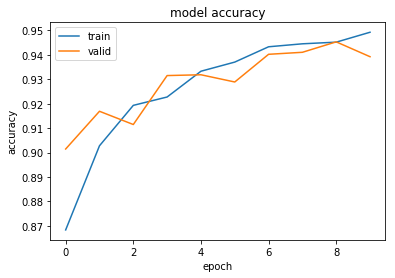

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

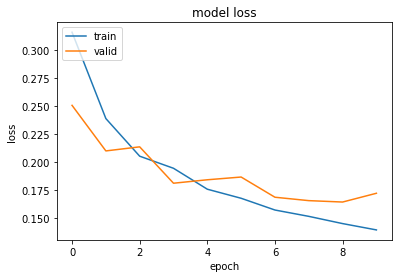

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()